# Real-world proxy experiments with LMR and PAGES2k

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np

## Create a reconstruction job object

In [2]:
job = cfr.ReconJob(verbose=True)

>>> job.configs:
{}


## Load a proxy database

In [3]:
job.load_proxydb('./data/pages2k_updated_Palmyra_dataset.pkl')
# the .plotly() method will generate an interactive map so that we are able to 
# check the proxy ID and location information of each site.
job.proxydb.plotly()

## Filter the proxy database

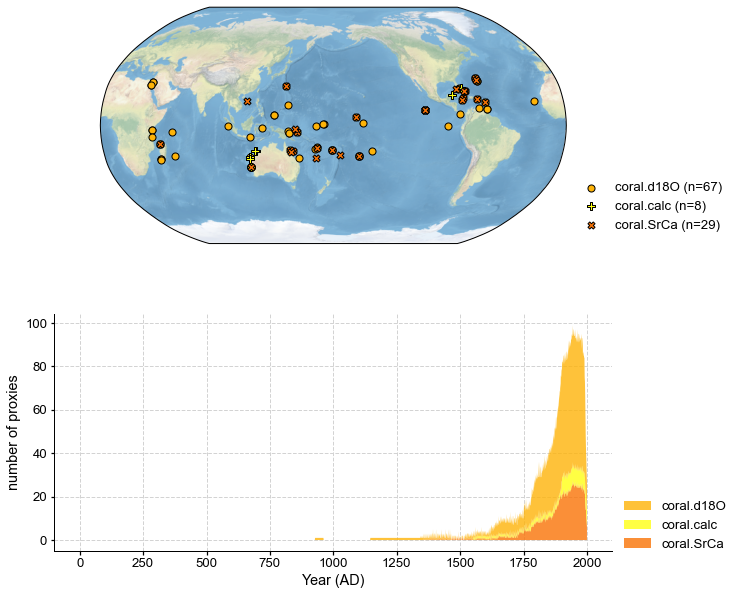

In [5]:
job.filter_proxydb(by='ptype', keys=['coral'])
# the .plot() method will generate a static map utilizing the Cartopy library
fig, ax = job.proxydb.plot(plot_count=True)

## Annualize/seasonalize the proxy database

>>> job.configs["annualize_proxydb_months"] = [12, 1, 2]
>>> job.configs["annualize_proxydb_ptypes"] = ['coral']


Annualizing ProxyRecord: 100%|██████████| 104/104 [00:01<00:00, 58.61it/s]


>>> 104 records remaining
>>> job.proxydb updated


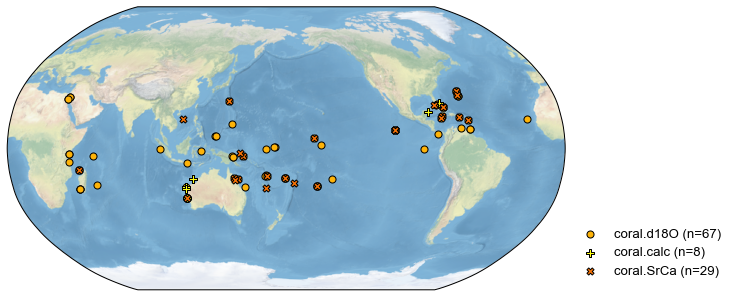

In [6]:
job.annualize_proxydb(months=[12, 1, 2], ptypes=['coral'], verbose=True)
fig, ax = job.proxydb.plot()

## Load climate model priors

In [7]:
job.load_clim(
    tag='prior',
    path_dict={
        'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
    },
    anom_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["prior_path"] = {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'}
>>> job.configs["prior_anom_period"] = (1951, 1980)
>>> job.configs["prior_lon_name"] = lon
>>> job.configs["prior_time_name"] = time
>>> prior variables ['tas'] loaded
>>> job.prior created


In [8]:
job.load_clim(
    tag='obs',
    path_dict={
        'tas': './data/gistemp1200_ERSSTv4.nc',
    },
    rename_dict={'tas': 'tempanomaly'},
    anom_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["obs_path"] = {'tas': './data/gistemp1200_ERSSTv4.nc'}
>>> job.configs["obs_rename_dict"] = {'tas': 'tempanomaly'}
>>> job.configs["obs_anom_period"] = (1951, 1980)
>>> job.configs["obs_lon_name"] = lon
>>> job.configs["obs_time_name"] = time
>>> obs variables ['tas'] loaded
>>> job.obs created


## Calibrate the PSMs

In [9]:
ptype_psm_dict = {
    'coral.d18O': 'Linear',
    'coral.calc': 'Linear',
    'coral.SrCa': 'Linear',
}
ptype_season_dict = {
    'coral.d18O': [12, 1, 2],  # boreal winter
    'coral.calc': [12, 1, 2],  # boreal winter
    'coral.SrCa': [12, 1, 2],  # boreal winter
}
job.calib_psms(
    ptype_psm_dict=ptype_psm_dict,
    ptype_season_dict=ptype_season_dict,
    calib_period=(1850, 2015),
    verbose=True,)

>>> job.configs["ptype_psm_dict"] = {'coral.d18O': 'Linear', 'coral.calc': 'Linear', 'coral.SrCa': 'Linear'}
>>> job.configs["ptype_season_dict"] = {'coral.d18O': [12, 1, 2], 'coral.calc': [12, 1, 2], 'coral.SrCa': [12, 1, 2]}
>>> job.configs["psm_calib_period"] = (1850, 2015)


Calibrating the PSMs:  19%|█▉        | 20/104 [00:00<00:02, 39.02it/s]

The number of overlapped data points is 14 < 25. Skipping ...
The number of overlapped data points is 20 < 25. Skipping ...
The number of overlapped data points is 22 < 25. Skipping ...


Calibrating the PSMs:  28%|██▊       | 29/104 [00:00<00:01, 38.74it/s]

The number of overlapped data points is 9 < 25. Skipping ...
The number of overlapped data points is 24 < 25. Skipping ...


Calibrating the PSMs:  55%|█████▍    | 57/104 [00:01<00:01, 42.27it/s]

The number of overlapped data points is 22 < 25. Skipping ...
The number of overlapped data points is 22 < 25. Skipping ...
The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  79%|███████▉  | 82/104 [00:02<00:00, 42.64it/s]

The number of overlapped data points is 21 < 25. Skipping ...


Calibrating the PSMs: 100%|██████████| 104/104 [00:02<00:00, 39.77it/s]

>>> The PSM for Ocn_144 failed to calibrate.
>>> The PSM for Ocn_149 failed to calibrate.
>>> The PSM for Ocn_150 failed to calibrate.
>>> The PSM for Ocn_145 failed to calibrate.
>>> The PSM for Ocn_152 failed to calibrate.
>>> The PSM for Ocn_164 failed to calibrate.
>>> The PSM for Ocn_165 failed to calibrate.
>>> The PSM for Ocn_138 failed to calibrate.
>>> The PSM for Ocn_183 failed to calibrate.
>>> 95 records tagged "calibrated" with ProxyRecord.psm created


## Forward the PSMs

In [10]:
job.forward_psms(verbose=True)

Forwarding the PSMs: 100%|██████████| 95/95 [00:08<00:00, 10.67it/s]

>>> ProxyRecord.pseudo created for 95 records


## Annualize/seasonalize the climate model prior

>>> job.configs["prior_annualize_months"] = [12, 1, 2]
>>> Processing tas ...
>>> job.prior updated


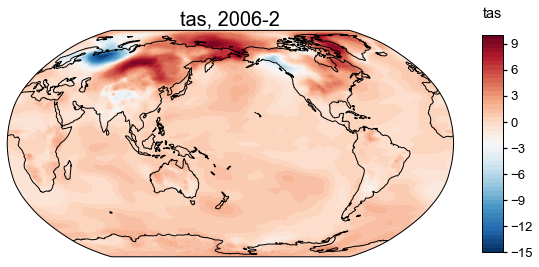

In [11]:
job.annualize_clim(tag='prior', verbose=True, months=[12, 1, 2])
fig, ax = job.prior['tas'].plot(it=-1)

## Regrid the prior field

In [12]:
job.regrid_clim(tag='prior', nlat=42, nlon=63, verbose=True)
job.prior['tas'].da

>>> job.configs["prior_regrid_nlat"] = 42
>>> job.configs["prior_regrid_nlon"] = 63
>>> Processing tas ...


<xarray.DataArray 'tas' (time: 1157, lat: 42, lon: 63)>
array([[[-7.81051636e-01, -9.22830398e-01, -8.39860487e-01, ...,
         -8.08501951e-01, -7.90614221e-01, -7.81051636e-01],
        [-3.78635377e-01, -4.53974173e-01, -3.50083854e-01, ...,
         -1.68662979e-01, -2.71238129e-01, -3.78635377e-01],
        [-1.40333148e+00, -1.14323499e+00, -7.99864423e-01, ...,
         -1.24427406e+00, -1.01681556e+00, -1.40333148e+00],
        ...,
        [ 1.51642583e+00,  2.00791711e+00,  2.99710146e+00, ...,
         -4.22339869e-01,  6.26514399e-01,  1.51642583e+00],
        [ 1.51600984e+00,  1.81332871e+00,  1.98969667e+00, ...,
          7.17246051e-01,  1.15366461e+00,  1.51600984e+00],
        [-6.69174194e-02, -1.14359702e-01, -1.13317428e-01, ...,
         -8.39093116e-02, -6.26213320e-02, -6.69174194e-02]],

       [[ 3.99113983e-01,  2.50226914e-01,  3.51283409e-01, ...,
          3.76062862e-01,  3.98603538e-01,  3.99113983e-01],
        [ 8.05754846e-01,  7.93750222e-01,  9.23834706e-01, ...,
          8.62339887e-01,  8.53999851e-01,  8.05754846e-01],
        [ 3.78598095e-01,  6.81967092e-01,  9.79965518e-01, ...,
          3.73871155e-01,  7.06629179e-01,  3.78598095e-01],
...
        [-4.03990124e+00, -3.95388919e+00, -3.67437594e+00, ...,
         -2.82537084e+00, -3.68772147e+00, -4.03990124e+00],
        [-3.06803561e+00, -3.13736595e+00, -3.03790458e+00, ...,
         -2.70351666e+00, -2.89840592e+00, -3.06803561e+00],
        [-1.92743433e+00, -1.87511402e+00, -1.85468564e+00, ...,
         -1.97049590e+00, -1.95583223e+00, -1.92743433e+00]],

       [[ 1.40498352e+00,  1.38947419e+00,  1.34637156e+00, ...,
          1.34081884e+00,  1.37822305e+00,  1.40498352e+00],
        [ 1.24801511e+00,  1.29332777e+00,  1.29418854e+00, ...,
          1.12494412e+00,  1.31675206e+00,  1.24801511e+00],
        [ 6.13445685e-01,  5.69961437e-01,  4.73153891e-01, ...,
          1.13487406e+00,  9.78545336e-01,  6.13445685e-01],
        ...,
        [ 2.36734525e+00,  2.68027267e+00,  2.81354435e+00, ...,
          1.76056505e+00,  2.16766833e+00,  2.36734525e+00],
        [ 2.38290957e+00,  1.92326236e+00,  1.38590705e+00, ...,
          2.66820318e+00,  2.51788330e+00,  2.38290957e+00],
        [ 1.39060974e+00,  1.33488021e+00,  1.31009797e+00, ...,
          1.42522898e+00,  1.41616428e+00,  1.39060974e+00]]])
Coordinates:
  * time     (time) object 0850-02-28 00:00:00 ... 2006-02-28 00:00:00
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
  * lat      (lat) float64 -90.0 -85.61 -81.22 -76.83 ... 76.83 81.22 85.61 90.0

## Crop the prior field

>>> job.configs["prior_lat_min"] = -35
>>> job.configs["prior_lat_max"] = 35
>>> job.configs["prior_lon_min"] = 0
>>> job.configs["prior_lon_max"] = 360
>>> Processing tas ...


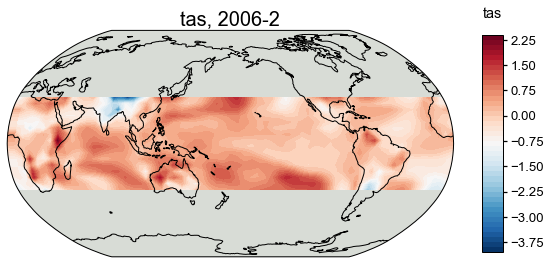

In [13]:
job.crop_clim(tag='prior', lat_min=-35, lat_max=35, verbose=True)
fig, ax = job.prior['tas'].plot(-1)

## Data assimilation

In [14]:
job.run_da_mc(save_dirpath='./results/lmr-real-pages2k', recon_seeds=list(range(1, 11)), verbose=True)

>>> job.configs["recon_period"] = [0, 2000]
>>> job.configs["recon_loc_rad"] = 25000
>>> job.configs["recon_timescale"] = 1
>>> job.configs["nens"] = 100
>>> job.configs["recon_seeds"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
>>> job.configs["assim_frac"] = 0.75
>>> job.configs["save_dirpath"] = ./results/lmr-real-pages2k
>>> job.configs["compress_params"] = {'zlib': True, 'least_significant_digit': 1}
>>> job.configs["output_full_ens"] = False
>>> job.configs["recon_sampling_mode"] = fixed
>>> seed: 1 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:31<00:00, 63.11it/s] 


>>> Reconstructed fields saved to: ./results/lmr-real-pages2k/job_r01_recon.nc
>>> seed: 2 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:27<00:00, 73.21it/s]  


>>> Reconstructed fields saved to: ./results/lmr-real-pages2k/job_r02_recon.nc
>>> seed: 3 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:33<00:00, 59.30it/s]  


>>> Reconstructed fields saved to: ./results/lmr-real-pages2k/job_r03_recon.nc
>>> seed: 4 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:32<00:00, 62.50it/s]  


>>> Reconstructed fields saved to: ./results/lmr-real-pages2k/job_r04_recon.nc
>>> seed: 5 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:39<00:00, 51.01it/s]  


>>> Reconstructed fields saved to: ./results/lmr-real-pages2k/job_r05_recon.nc
>>> seed: 6 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:33<00:00, 59.22it/s]  


>>> Reconstructed fields saved to: ./results/lmr-real-pages2k/job_r06_recon.nc
>>> seed: 7 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:37<00:00, 53.96it/s]  


>>> Reconstructed fields saved to: ./results/lmr-real-pages2k/job_r07_recon.nc
>>> seed: 8 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:46<00:00, 43.16it/s]  


>>> Reconstructed fields saved to: ./results/lmr-real-pages2k/job_r08_recon.nc
>>> seed: 9 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:51<00:00, 38.71it/s]  


>>> Reconstructed fields saved to: ./results/lmr-real-pages2k/job_r09_recon.nc
>>> seed: 10 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:39<00:00, 50.75it/s]  


>>> Reconstructed fields saved to: ./results/lmr-real-pages2k/job_r10_recon.nc
>>> DONE! Total time used: 8.73 mins.


## Validation

In [15]:
res = cfr.ReconRes('./results/lmr-real-pages2k', verbose=True)

>>> recon.paths:
['./results/lmr-real-pages2k/job_r01_recon.nc', './results/lmr-real-pages2k/job_r02_recon.nc', './results/lmr-real-pages2k/job_r03_recon.nc', './results/lmr-real-pages2k/job_r04_recon.nc', './results/lmr-real-pages2k/job_r05_recon.nc', './results/lmr-real-pages2k/job_r06_recon.nc', './results/lmr-real-pages2k/job_r07_recon.nc', './results/lmr-real-pages2k/job_r08_recon.nc', './results/lmr-real-pages2k/job_r09_recon.nc', './results/lmr-real-pages2k/job_r10_recon.nc']


In [16]:
res.load(['nino3.4', 'tas'], verbose=True)

>>> ReconRes.recons["nino3.4"] created
>>> ReconRes.da["nino3.4"] created
>>> ReconRes.recons["tas"] created
>>> ReconRes.da["tas"] created


In [17]:
import scipy.io as sio
import numpy as np

data = sio.loadmat('./data/BC09_NINO34.mat')
start_yr = 1874
end_yr = 2000
nyr = end_yr-start_yr+1
nino34 = np.zeros(nyr)
for i in range(nyr):
    nino34[i] = np.mean(data['nino34'][12+i*12:14+i*12])

ref_value = nino34
ref_time = np.arange(start_yr, end_yr+1)
ref_name = 'BC09'

(1600.0, 2000.0)

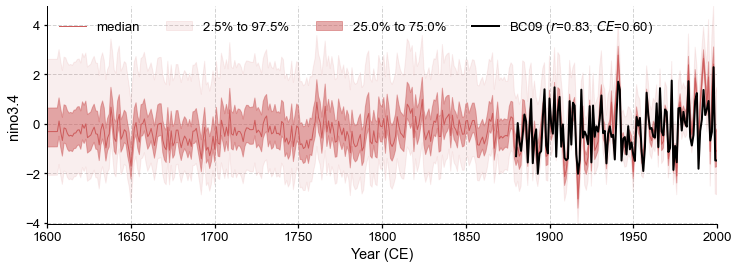

In [19]:
fig, ax = res.recons['nino3.4'].validate(ref_time, ref_value, ref_name).plot_qs()
ax.set_xlim(1600, 2000)

In [22]:
import xarray as xr
ds = xr.open_dataset('./data/tas_sfc_Amon_20CR_185101-201112.nc')
ref_fd = cfr.ClimateField().from_da(da=ds['tas'])

In [30]:
ref_fd_ann = ref_fd.get_anom(ref_period=[1951, 1980]).annualize(months=[12, 1, 2])

In [34]:
ref_fd_ann.da

<xarray.DataArray 'tas' (time: 162, lat: 91, lon: 180)>
array([[[ 7.1690369e-01,  7.1690369e-01,  7.1690369e-01, ...,
          7.1690369e-01,  7.1690369e-01,  7.1690369e-01],
        [ 2.1503525e+00,  2.2120514e+00,  2.2679214e+00, ...,
          1.9588776e+00,  2.0245361e+00,  2.0886612e+00],
        [ 3.3581619e+00,  3.5077972e+00,  3.6580200e+00, ...,
          2.8810577e+00,  3.0441284e+00,  3.2046814e+00],
        ...,
        [-2.5335846e+00, -2.5581741e+00, -2.5896301e+00, ...,
         -2.4542542e+00, -2.4814224e+00, -2.5090103e+00],
        [-2.7338181e+00, -2.7434692e+00, -2.7536087e+00, ...,
         -2.7088242e+00, -2.7198486e+00, -2.7293015e+00],
        [-2.5562592e+00, -2.5562592e+00, -2.5562592e+00, ...,
         -2.5562592e+00, -2.5562592e+00, -2.5562592e+00]],

       [[-3.0655415e+00, -3.0655415e+00, -3.0655415e+00, ...,
         -3.0655415e+00, -3.0655415e+00, -3.0655415e+00],
        [-2.8594921e+00, -2.8558757e+00, -2.8606415e+00, ...,
         -2.8627167e+00, -2.8661449e+00, -2.8624775e+00],
        [-2.4746449e+00, -2.4591777e+00, -2.4497173e+00, ...,
         -2.5207012e+00, -2.5011952e+00, -2.4882710e+00],
...
        [ 2.7984619e-02,  4.6620686e-02,  6.0612995e-02, ...,
         -2.7104696e-02, -8.6263018e-03,  6.4849854e-03],
        [ 2.0793152e-01,  2.1215820e-01,  2.2059123e-01, ...,
          1.7850749e-01,  1.8646748e-01,  1.9814555e-01],
        [-1.5599568e-01, -1.5599568e-01, -1.5599568e-01, ...,
         -1.5599568e-01, -1.5599568e-01, -1.5599568e-01]],

       [[ 7.5868530e+00,  7.5868530e+00,  7.5868530e+00, ...,
          7.5868530e+00,  7.5868530e+00,  7.5868530e+00],
        [ 6.0601959e+00,  6.0754242e+00,  6.1032867e+00, ...,
          5.9857178e+00,  6.0076447e+00,  6.0339203e+00],
        [ 3.4533081e+00,  3.5451508e+00,  3.6359253e+00, ...,
          3.2262268e+00,  3.2963715e+00,  3.3673859e+00],
        ...,
        [-4.3894653e+00, -4.4257355e+00, -4.4487305e+00, ...,
         -4.2693329e+00, -4.3131714e+00, -4.3542023e+00],
        [-3.4067535e+00, -3.4344177e+00, -3.4751892e+00, ...,
         -3.2930908e+00, -3.3261566e+00, -3.3700714e+00],
        [-2.6226349e+00, -2.6226349e+00, -2.6226349e+00, ...,
         -2.6226349e+00, -2.6226349e+00, -2.6226349e+00]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1851-02-28 1852-02-29 ... 2012-02-29
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning:

Degrees of freedom <= 0 for slice.

/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning:

Degrees of freedom <= 0 for slice.

/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:872: UserWarning:

Attempting to set identical left == right == -180.0 results in singular transformations; automatically expanding.



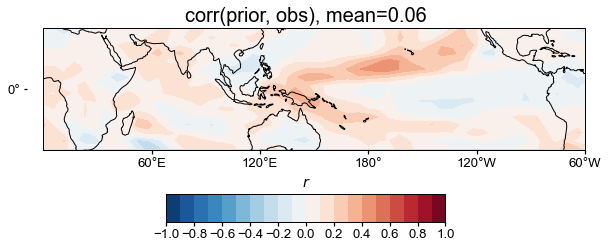

Figure saved at: "results/lmr-real-pages2k/corr_prior_obs.pdf"


In [85]:
stat = 'corr'
valid_fd = job.prior['tas'].validate(
    ref_fd_ann, stat=stat,
    interp_direction='from-ref',
    valid_period=(1874, 2000),
    time_name='time',
)

valid_fd.plot_kwargs.update({'cbar_orientation': 'horizontal', 'cbar_pad': 0.1})
fig, ax = valid_fd.plot(
    title=f'{stat}(prior, obs), mean={valid_fd.geo_mean().values[0]:.2f}',
    projection='PlateCarree',
    latlon_range=(-34, 34, 0, 360),
    **valid_fd.plot_kwargs)

cfr.showfig(fig)
cfr.savefig(fig, './results/lmr-real-pages2k/corr_prior_obs.pdf')

/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning:

Degrees of freedom <= 0 for slice.

/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning:

Degrees of freedom <= 0 for slice.

/Users/fzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:872: UserWarning:

Attempting to set identical left == right == -180.0 results in singular transformations; automatically expanding.



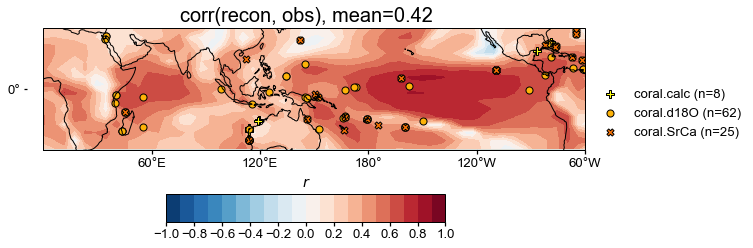

Figure saved at: "results/lmr-real-pages2k/corr_recon_obs.pdf"


In [84]:
stat = 'corr'
valid_fd = res.recons['tas'].validate(
    ref_fd_ann, stat=stat,
    valid_period=(1874, 2000),
    interp_direction='from-ref',
    time_name='time',
)
valid_fd.plot_kwargs.update({'cbar_orientation': 'horizontal', 'cbar_pad': 0.1})

fig, ax = valid_fd.plot(
    title=f'{stat}(recon, obs), mean={valid_fd.geo_mean().values[0]:.2f}',
    projection='PlateCarree',
    latlon_range=(-34, 34, 0, 360),
    plot_proxydb=True, proxydb=job.proxydb.filter(by='tag', keys=['calibrated']),
    proxydb_lgd_kws={'loc': 'lower left', 'bbox_to_anchor': (1, 0)},
    **valid_fd.plot_kwargs)

cfr.showfig(fig)
cfr.savefig(fig, './results/lmr-real-pages2k/corr_recon_obs.pdf')